#    DOWNLOADING CSV FILES FROM www.kaggle.com AND REPRESENTING THEM IN DATAFRAME AND PLOTS

In [235]:
import pandas as pd 
import matplotlib.pyplot as pl

data = pd.read_csv('covid_19_india.csv')
dataf = pd.DataFrame(data)
print(dataf)

       Sno      Date     Time              State/UnionTerritory  \
0        1  30/01/20  6:00 PM                            Kerala   
1        2  31/01/20  6:00 PM                            Kerala   
2        3  01/02/20  6:00 PM                            Kerala   
3        4  02/02/20  6:00 PM                            Kerala   
4        5  03/02/20  6:00 PM                            Kerala   
...    ...       ...      ...                               ...   
3706  3707  03/07/20  8:00 AM                           Tripura   
3707  3708  03/07/20  8:00 AM                       Uttarakhand   
3708  3709  03/07/20  8:00 AM                     Uttar Pradesh   
3709  3710  03/07/20  8:00 AM                       West Bengal   
3710  3711  03/07/20  8:00 AM  Cases being reassigned to states   

     ConfirmedIndianNational ConfirmedForeignNational  Cured  Deaths  \
0                          1                        0      0       0   
1                          1                       

In [239]:
Data = dataf[['State/UnionTerritory','Confirmed','Cured','Deaths']]
print(Data)

                  State/UnionTerritory  Confirmed  Cured  Deaths
0                               Kerala          1      0       0
1                               Kerala          1      0       0
2                               Kerala          2      0       0
3                               Kerala          3      0       0
4                               Kerala          3      0       0
...                                ...        ...    ...     ...
3706                           Tripura       1435   1146       1
3707                       Uttarakhand       2984   2405      42
3708                     Uttar Pradesh      24825  17221     735
3709                       West Bengal      19819  13037     699
3710  Cases being reassigned to states       6031      0       0

[3711 rows x 4 columns]


In [245]:
df_pivot = pd.pivot_table(dataf,index="State/UnionTerritory").drop(columns = 'Sno').sort_values(by="Confirmed")
print(df_pivot)

                                             Confirmed         Cured  \
State/UnionTerritory                                                   
Daman & Diu                                   2.000000      0.000000   
Dadar Nagar Haveli                            5.027027      0.378378   
Meghalaya                                    24.777778     14.654321   
Andaman and Nicobar Islands                  32.020000     24.060000   
Mizoram                                      33.495050      6.861386   
Arunachal Pradesh                            37.782609      7.315217   
Sikkim                                       42.341463     13.707317   
Unassigned                                   53.666667      0.000000   
Puducherry                                  100.027778     39.018519   
Dadra and Nagar Haveli and Daman and Diu    109.545455     32.772727   
Nagaland                                    153.479167     59.229167   
Ladakh                                      167.697479     65.94

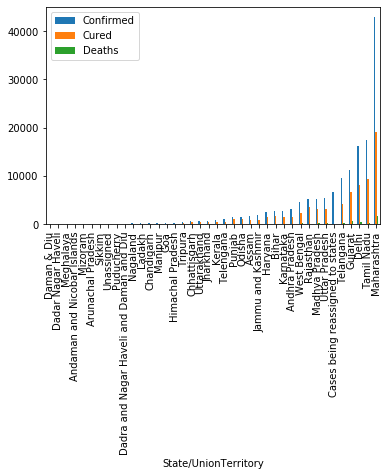

In [246]:
df_pivot.plot(kind='bar')
pl.show()

# TKINTER APPLICATION: PANDEMIC ANALYSER

In [243]:
import numpy as np
import pandas as pd
from tkinter import *

CovidDF = pd.read_csv("States_covid_19_india.csv").drop(columns = 'Sno')
PoplDF = pd.read_csv("population_india_census2011.csv").sort_values(by=['State / Union Territory'])
PoplDF.set_index("State / Union Territory", inplace = True)
CovidData = CovidDF.groupby('State/UnionTerritory').sum()
PoplData = pd.DataFrame(PoplDF['Population'])
FinalData = pd.concat([CovidData, PoplData], axis=1, sort=True).dropna().rename_axis("State")
FinalData['IFR'] = FinalData.apply(lambda row: round((row.Deaths*100)/row.Confirmed,4), axis = 1)
FinalData['CMR'] = FinalData.apply(lambda row: round((row.Deaths*100)/row.Population,4), axis = 1)

print(FinalData.head())

root = Tk()
root.geometry('450x400+1200+150')
root.title('PANDEMIC ANALYTICS ENGINE')

def selected(event):
    b = clicked.get()
    Selected = FinalData.loc[[b]]
    
    Confirmed = Selected.at[b,'Confirmed']
    myLabelC = Label(root, text = Confirmed,bg = 'yellow').grid(row = 200, column = 400, padx = 20, pady = 20)
   
    Cured = Selected.at[b,'Cured']
    myLabelCU = Label(root, text = Cured,bg = 'green').grid(row = 300, column = 400, padx = 20, pady = 20)
    
    Deaths = Selected.at[b,'Deaths']
    myLabelD = Label(root, text = Deaths,bg = 'red').grid(row = 400, column = 400, padx = 20, pady = 20)
    
    myLabelCIFR = Label(root, text = '                                                       ',bg = 'plum').grid(row = 600, column = 400, padx = 20, pady = 20)
    
    IFR = Selected.at[clicked.get(),'IFR']
    CMR = Selected.at[clicked.get(),'CMR']
    
def IFRS():
    b = clicked.get()
    Selected = FinalData.loc[[b]]
    IFR = Selected.at[b,'IFR']
    CMR = Selected.at[b,'CMR']
    myLabelCIFR = Label(root, text = IFR,bg = 'plum').grid(row = 600, column = 400, padx = 20, pady = 20)
    
def CMRS():
    b = clicked.get()
    Selected = FinalData.loc[[b]]
    IFR = Selected.at[b,'IFR']
    CMR = Selected.at[b,'CMR']
    myLabelCMR = Label(root, text = CMR,bg = 'plum').grid(row = 600, column = 400, padx = 20, pady = 20)
    
    
LC = Label(text = ' CONFIRMED', fg= 'white',bg = '#999900').grid(row = 200, column = 100, padx = 20, pady = 20)    
LCU = Label(text= ' CURED          ', fg= 'white',bg = '#228B22').grid(row = 300, column = 100, padx = 20, pady = 20)
LD = Label(text = ' DEATHS        ', fg= 'white',bg = '#8B0000').grid(row = 400, column = 100, padx = 20, pady = 20)

myLabelC1 = Label(root, text = '                                                       ',bg = 'yellow').grid(row = 200, column = 400, padx = 20, pady = 20)
myLabelCU1 = Label(root, text = '                                                       ',bg = 'green').grid(row = 300, column = 400, padx = 20, pady = 20)
myLabelD1 = Label(root, text = '                                                       ',bg = 'red').grid(row = 400, column = 400, padx = 20, pady = 20)

Options = FinalData.index.values.tolist()
clicked= StringVar()
clicked.set('LIST OF STATES')
L1 = Label(text = 'SELECT STATE', fg= 'white',bg = 'blue').grid(row = 100, column = 100, padx = 20, pady = 20)
drop = OptionMenu(root, clicked, *Options, command=selected).grid(row = 100, column = 400, padx = 20, pady = 20)


IfrB = Button(text = 'IFR',fg= 'white',bg = 'blue', command = IFRS).grid(row = 500, column = 100, padx = 20, pady = 20)
CmrB = Button(text = 'CMR',fg= 'white',bg = 'blue', command = CMRS).grid(row = 500, column = 400, padx = 20, pady = 20)

root.mainloop()

                                Cured  Deaths  Confirmed   Population     IFR  \
State                                                                           
Andaman and Nicobar Islands    2406.0     0.0     3202.0     380581.0  0.0000   
Andhra Pradesh               172711.0  5385.0   353409.0   49577103.0  1.5237   
Arunachal Pradesh               673.0     8.0     3476.0    1383727.0  0.2301   
Assam                         85791.0   342.0   158131.0   31205576.0  0.2163   
Bihar                        168614.0  1772.0   275501.0  104099452.0  0.6432   

                                CMR  
State                                
Andaman and Nicobar Islands  0.0000  
Andhra Pradesh               0.0109  
Arunachal Pradesh            0.0006  
Assam                        0.0011  
Bihar                        0.0017  
